In [ ]:
# --- 1) Setup ---

# Import necessary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import requests

# Define paths and filenames
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
DATA_DIR = os.path.join(PROJECT_ROOT, "data")
PROC_DIR = os.path.join(DATA_DIR, "processed")
os.makedirs(PROC_DIR, exist_ok=True)

# Path to the unfiltered EDA dataset
OUT_EDA_FULL  = os.path.join(PROC_DIR, "cleaned_project_data_eda.csv")  # Full EDA dataset

# Optional: Link for downloading the dataset if not found locally
DOWNLOAD_URL = "https://drive.google.com/uc?id=1A1j9JsYjmD1EuanF9FFWsgi2wGbKQ1bg&export=download"

# Check if the file exists locally
if not os.path.exists(OUT_EDA_FULL):
    print("Dataset not found locally. Downloading from Google Drive...")
    # Download the file using the provided link
    response = requests.get(DOWNLOAD_URL)
    if response.status_code == 200:
        with open(OUT_EDA_FULL, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded dataset to {OUT_EDA_FULL}")
    else:
        raise FileNotFoundError(f"Failed to download dataset from the link. HTTP Status: {response.status_code}")

# Load the full EDA dataset
df = pd.read_csv(OUT_EDA_FULL, encoding="utf-8")
print(f"Loaded dataset: shape={df.shape}")
print(f"Columns: {df.columns.tolist()}")
df.head(2)


Loaded dataset: shape=(17797, 19)
Columns: ['id', 'status', 'project_title', 'startDate', 'endDate', 'totalCost', 'ecMaxContribution', 'topics', 'keywords_str', 'topic_text', 'project_text_simple', 'project_text_keywords', 'year', 'year_-1', 'year_2021', 'year_2022', 'year_2023', 'year_2024', 'year_2025']


,id,status,project_title,startDate,endDate,totalCost,ecMaxContribution,topics,keywords_str,topic_text,project_text_simple,project_text_keywords,year,year_-1,year_2021,year_2022,year_2023,year_2024,year_2025
0,101234994,SIGNED,OPTIMALMINE: slope optimal design for a paradi...,2025-09-01,2029-08-31,0,1072140,HORIZON-MSCA-2024-SE-01-01,mine optimisation rock slope engineering optim...,HORIZON-MSCA-2024-SE-01-01 Expected Outcome: P...,optimalmine slope optimal design for a paradig...,optimalmine slope optimal design for a paradig...,2024,0,0,0,0,1,0
1,101232577,SIGNED,Innovative high-sensitivity avalanche field-ef...,2025-09-01,2029-08-31,0,1618230,HORIZON-MSCA-2024-SE-01-01,field-effect transistor-based biosensors cance...,HORIZON-MSCA-2024-SE-01-01 Expected Outcome: P...,innovative highsensitivity avalanche fieldeffe...,innovative highsensitivity avalanche fieldeffe...,2024,0,0,0,0,1,0


In [ ]:
# --- 2) Filtering ---

# Filtering out very generic topics
GENERIC_PREFIXES = ("ERC", "HORIZON-MSCA", "HORIZON-WIDERA", "HORIZON-EIC", "HORIZON-EIE")
mask_keep = ~df["topics"].astype(str).str.startswith(GENERIC_PREFIXES)

# Create the filtered dataset
df_filtered = df.loc[mask_keep].reset_index(drop=True)

print(f"Rows after filtering (filtered dataset): {len(df_filtered)} / {len(df)}")
print(f"Unique topics in filtered dataset: {df_filtered['topics'].nunique()}")

Rows after filtering (filtered dataset): 4429 / 17797
Unique topics in filtered dataset: 1873


Total number of projects: 17797
Total number of unique topics: 2073

Projects per topic distribution:


count    2073.000000
mean        8.585142
std        66.644157
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max      1672.000000
Name: count, dtype: float64


Top 10 topics by number of projects:


topics
HORIZON-MSCA-2024-PF-01-01    1672
HORIZON-MSCA-2023-PF-01-01    1306
HORIZON-MSCA-2022-PF-01-01    1278
HORIZON-MSCA-2021-PF-01-01    1198
ERC-2024-STG                   481
ERC-2021-STG                   464
ERC-2022-STG                   409
ERC-2023-STG                   398
ERC-2022-COG                   322
ERC-2021-COG                   316
Name: count, dtype: int64

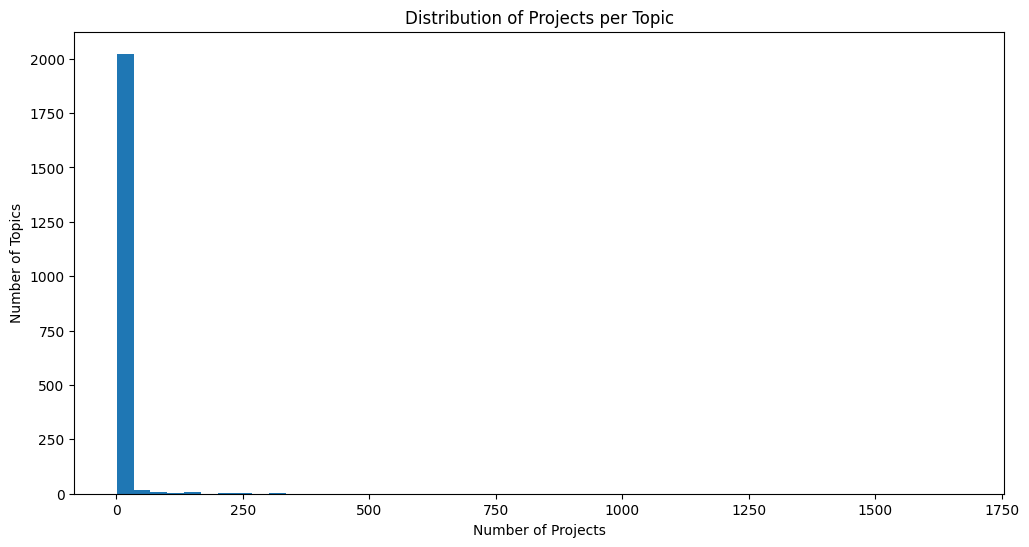

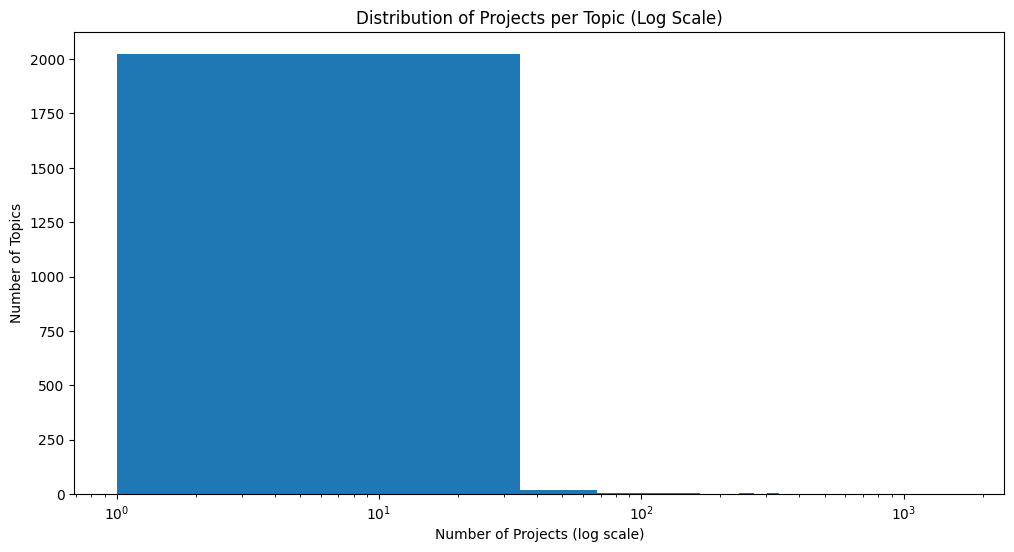

In [ ]:
# --- 3) EDA on Filtered Dataset ---

# How many projects in total?
print(f"Total number of projects: {len(df)}")
print(f"Total number of unique topics: {df['topics'].nunique()}")

# Count projects per topic
topic_counts = df['topics'].value_counts()

# Display descriptive statistics for project counts per topic
print("\nProjects per topic distribution:")
display(topic_counts.describe())

# Show the number of projects for the top topics
print("\nTop 10 topics by number of projects:")
display(topic_counts.head(10))

# Plot the distribution of projects per topic
plt.figure(figsize=(12, 6))
topic_counts.hist(bins=50)
plt.title('Distribution of Projects per Topic')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Topics')
plt.grid(False)
plt.show()

# Plot the distribution on a log scale for better visibility of topics with few projects
plt.figure(figsize=(12, 6))
topic_counts.hist(bins=50)
plt.xscale('log')
plt.title('Distribution of Projects per Topic (Log Scale)')
plt.xlabel('Number of Projects (log scale)')
plt.ylabel('Number of Topics')
plt.grid(False)
plt.show()

In [ ]:
# --- 4) Grouping Topics by Prefix ---
# Extract the first 12 characters of the topic name
df['topic_prefix_12'] = df['topics'].str[:12]

# Group by the prefix and count the number of projects
topic_prefix_counts = df['topic_prefix_12'].value_counts()

print("Top 10 topic groups based on the first 12 characters:")
display(topic_prefix_counts.head(10))

# Drop the temporary column
df = df.drop(columns=['topic_prefix_12'])

Top 10 topic groups based on the first 12 characters:


topic_prefix_12
HORIZON-MSCA    6520
HORIZON-EIC-    1090
HORIZON-CL4-     896
HORIZON-CL5-     857
HORIZON-WIDE     723
HORIZON-CL6-     631
ERC-2024-STG     481
ERC-2021-STG     464
ERC-2022-STG     409
HORIZON-HLTH     406
Name: count, dtype: int64

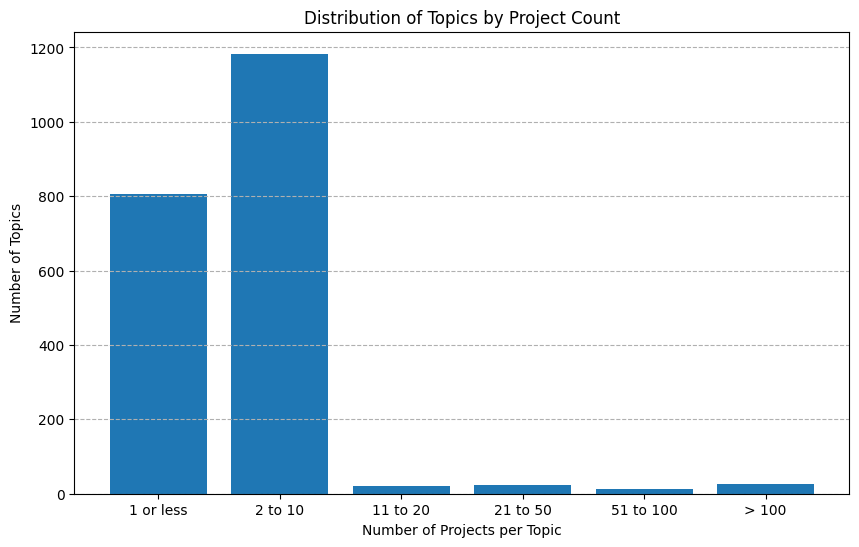

In [ ]:
# --- 5) Binning Topics by Project Count ---
# Define the bins for project counts
bin_1 = (topic_counts <= 1).sum()
bin_2_10 = ((topic_counts > 1) & (topic_counts <= 10)).sum()
bin_11_20 = ((topic_counts > 10) & (topic_counts <= 20)).sum()
bin_21_50 = ((topic_counts > 20) & (topic_counts <= 50)).sum()
bin_51_100 = ((topic_counts > 50) & (topic_counts <= 100)).sum()
bin_100_plus = (topic_counts > 100).sum()

# Create labels for the bins
bin_labels = ['1 or less', '2 to 10', '11 to 20', '21 to 50', '51 to 100', '> 100']
bin_counts = [bin_1, bin_2_10, bin_11_20, bin_21_50, bin_51_100, bin_100_plus]

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.bar(bin_labels, bin_counts)
plt.title('Distribution of Topics by Project Count')
plt.xlabel('Number of Projects per Topic')
plt.ylabel('Number of Topics')
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
# --- 6) Analysis of Projects with Empty Keywords ---

# Check for missing values in the dataset
print("\nMissing values per column:")
print(df.isnull().sum())

# Filter for rows where keywords_str is empty or null
empty_keywords_df = df[df['keywords_str'].isnull() | (df['keywords_str'].str.strip() == '')]

print(f"\nAnalysis of projects with empty 'keywords_str' (Total: {len(empty_keywords_df)} projects):")

# Check for common topics with empty keywords
print("\nDistribution of 'topics' for projects with empty 'keywords_str':")
display(empty_keywords_df['topics'].value_counts().head(10)) # Display top 10 topics for brevity


Missing values per column:
id                          0
status                      0
project_title               0
startDate                   0
endDate                     0
totalCost                   0
ecMaxContribution           0
topics                      0
keywords_str             1543
topic_text                  0
project_text_simple         0
project_text_keywords       0
year                        0
year_-1                     0
year_2021                   0
year_2022                   0
year_2023                   0
year_2024                   0
year_2025                   0
dtype: int64

Analysis of projects with empty 'keywords_str' (Total: 1543 projects):

Distribution of 'topics' for projects with empty 'keywords_str':


topics
ERC-2023-POC                  213
ERC-2022-POC2                 208
ERC-2024-POC                  193
ERC-2022-POC1                 156
HORIZON-MSCA-2024-PF-01-01     42
ERC-2024-STG                   29
HORIZON-MSCA-2021-PF-01-01     28
HORIZON-MSCA-2023-PF-01-01     28
ERC-2023-STG                   27
ERC-2022-STG                   27
Name: count, dtype: int64

In [ ]:
# --- 7) Text Length Analysis ---
# Calculate text lengths
df["_len_project_text_simple"] = df.get("project_text_simple", "").fillna("").apply(len)
df["_len_topic_text"]          = df.get("topic_text", "").fillna("").apply(len)

print("\nText length summary (characters) for semantic matching consideration:")
display(df[["_len_project_text_simple", "_len_topic_text"]].describe())


Text length summary (characters) for semantic matching consideration:


,_len_project_text_simple,_len_topic_text
count,17797.000000,17797.000000
mean,1915.531101,5199.648199
std,291.432977,2738.400662
min,95.000000,351.000000
25%,1889.000000,2593.000000
50%,2032.000000,5414.000000
75%,2073.000000,7564.000000
max,4046.000000,34946.000000


In [ ]:
# --- 8) Project Duration Analysis ---
# Convert date columns to datetime objects
df['startDate'] = pd.to_datetime(df['startDate'], errors='coerce')
df['endDate'] = pd.to_datetime(df['endDate'], errors='coerce')

# Calculate project duration in days
df['duration_days'] = (df['endDate'] - df['startDate']).dt.days

print("\nProject duration statistics (in days):")
display(df['duration_days'].describe())


Project duration statistics (in days):


count    17797.000000
mean      1198.521773
std        473.013752
min        182.000000
25%        730.000000
50%       1095.000000
75%       1825.000000
max       3652.000000
Name: duration_days, dtype: float64

In [ ]:
# --- 9) Financial Analysis ---
# How high are the ecMaxContributions and is that realistic? 
print("\nStatistics for 'ecMaxContribution':")
display(df['ecMaxContribution'].describe())

# Check for totalCost and how many fields are 0
print("\nStatistics for 'totalCost':")
display(df['totalCost'].describe())
zero_total_cost_count = (df['totalCost'] == '0').sum()
print(f"\nNumber of projects with 'totalCost' = 0: {zero_total_cost_count} out of {len(df)}")


Statistics for 'ecMaxContribution':


count      17797
unique      9996
top       150000
freq         851
Name: ecMaxContribution, dtype: object


Statistics for 'totalCost':


count     17797
unique     7928
top           0
freq       8636
Name: totalCost, dtype: object


Number of projects with 'totalCost' = 0: 8636 out of 17797


In [ ]:
# --- 10) Baseline Models ---
# Import necessary libraries for baseline models
import random
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Helper function to evaluate the accuracy
def evaluate(df_results):
    """Compute Top-1 and Top-10 accuracy."""
    top1_acc = np.mean(df_results['true_topic'] == df_results['top1_pred'])
    top10_acc = np.mean(df_results.apply(lambda row: row['true_topic'] in row['top10_pred'], axis=1))
    return {'Top-1 Accuracy': top1_acc, 'Top-10 Accuracy': top10_acc}

# Random baseline predictions
def random_baseline(df, n_candidates=10, seed=42):
    """Random baseline predictions."""
    random.seed(seed)
    topics_list = df['topics'].unique().tolist()
    results = []
    for _, row in df.iterrows():
        random_topics = random.sample(topics_list, min(n_candidates, len(topics_list)))
        results.append({
            'project_id': row['id'],
            'true_topic': row['topics'],
            'top1_pred': random_topics[0],
            'top10_pred': random_topics
        })
    return pd.DataFrame(results)

# TF-IDF + Cosine similarity baseline
def tfidf_cosine_baseline(df, text_col, n_candidates=10):
    """TF-IDF + Cosine similarity baseline."""
    vectorizer = TfidfVectorizer(max_features=50000)

    # Fit TF-IDF on topic descriptions
    topic_texts = df[['topics', 'topic_text']].drop_duplicates().reset_index(drop=True)
    tfidf_topic = vectorizer.fit_transform(topic_texts['topic_text'])

    results = []

    for _, row in df.iterrows():
        project_vec = vectorizer.transform([row[text_col]])
        cosine_scores = cosine_similarity(project_vec, tfidf_topic).flatten()

        # Get top-N indices
        top_idx = cosine_scores.argsort()[::-1][:n_candidates]
        top_topics = topic_texts.iloc[top_idx]['topics'].tolist()

        results.append({
            'project_id': row['id'],
            'true_topic': row['topics'],
            'top1_pred': top_topics[0],
            'top10_pred': top_topics
        })
    return pd.DataFrame(results)

# Assuming all necessary imports and function definitions are included above

# Filtered baseline model
df_random_filtered = random_baseline(df_filtered)
df_random_unfiltered = random_baseline(df)

# Evaluate random baseline performance
eval_random_filtered = evaluate(df_random_filtered)
eval_random_unfiltered = evaluate(df_random_unfiltered)

# TF-IDF + Cosine similarity baseline for both datasets
text_variants = ['project_text_simple', 'project_text_keywords']
baseline_results_filtered = {}
baseline_results_unfiltered = {}

for col in text_variants:
    print(f"\nRunning TF-IDF Cosine for filtered dataset: {col}")
    df_tfidf_filtered = tfidf_cosine_baseline(df_filtered, col)
    baseline_results_filtered[col] = evaluate(df_tfidf_filtered)
    print(f"Results for filtered dataset {col}: {baseline_results_filtered[col]}")

    print(f"\nRunning TF-IDF Cosine for unfiltered dataset: {col}")
    df_tfidf_unfiltered = tfidf_cosine_baseline(df, col)
    baseline_results_unfiltered[col] = evaluate(df_tfidf_unfiltered)
    print(f"Results for unfiltered dataset {col}: {baseline_results_unfiltered[col]}")



Running TF-IDF Cosine for filtered dataset: project_text_simple
Results for filtered dataset project_text_simple: {'Top-1 Accuracy': np.float64(0.5608489501016031), 'Top-10 Accuracy': np.float64(0.8552720704447957)}

Running TF-IDF Cosine for unfiltered dataset: project_text_simple
Results for unfiltered dataset project_text_simple: {'Top-1 Accuracy': np.float64(0.1563746698881834), 'Top-10 Accuracy': np.float64(0.2576276900601225)}

Running TF-IDF Cosine for filtered dataset: project_text_keywords
Results for filtered dataset project_text_keywords: {'Top-1 Accuracy': np.float64(0.5793632874237977), 'Top-10 Accuracy': np.float64(0.8713027771505983)}

Running TF-IDF Cosine for unfiltered dataset: project_text_keywords
Results for unfiltered dataset project_text_keywords: {'Top-1 Accuracy': np.float64(0.16126313423610722), 'Top-10 Accuracy': np.float64(0.2605495308198011)}


In [ ]:
# --- 11) Summary of Baseline Results ---
# Prepare a dictionary of results
summary_dict = {
    'Dataset': ['Filtered', 'Filtered', 'Unfiltered', 'Unfiltered'],
    'Text Variant': ['project_text_simple', 'project_text_keywords', 'project_text_simple', 'project_text_keywords'],
    'Top-1 Accuracy': [
        baseline_results_filtered['project_text_simple']['Top-1 Accuracy'],
        baseline_results_filtered['project_text_keywords']['Top-1 Accuracy'],
        baseline_results_unfiltered['project_text_simple']['Top-1 Accuracy'],
        baseline_results_unfiltered['project_text_keywords']['Top-1 Accuracy'],
    ],
    'Top-10 Accuracy': [
        baseline_results_filtered['project_text_simple']['Top-10 Accuracy'],
        baseline_results_filtered['project_text_keywords']['Top-10 Accuracy'],
        baseline_results_unfiltered['project_text_simple']['Top-10 Accuracy'],
        baseline_results_unfiltered['project_text_keywords']['Top-10 Accuracy'],
    ]
}

# Convert to DataFrame
summary_df = pd.DataFrame(summary_dict)

# Show the table
print("Baseline Results Summary:")
display(summary_df)


Baseline Results Summary:


,Dataset,Text Variant,Top-1 Accuracy,Top-10 Accuracy
0,Filtered,project_text_simple,0.560849,0.855272
1,Filtered,project_text_keywords,0.579363,0.871303
2,Unfiltered,project_text_simple,0.156375,0.257628
3,Unfiltered,project_text_keywords,0.161263,0.260550


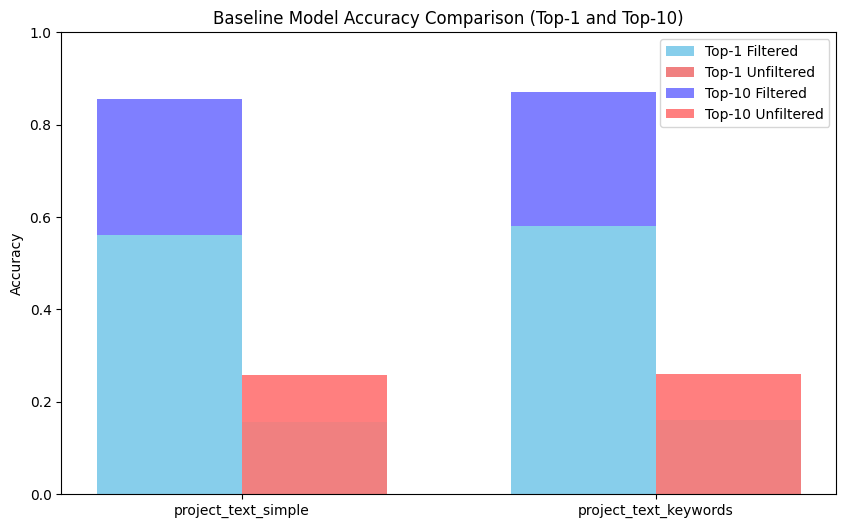

In [ ]:
# --- 12) Visualization of Baseline Results ---
import matplotlib.pyplot as plt
import numpy as np

# Set up bar positions
labels = summary_df['Text Variant'].unique()
x = np.arange(len(labels))  # the label locations
width = 0.35  # width of the bars

# Top-1 Accuracy
top1_filtered = summary_df[summary_df['Dataset'] == 'Filtered']['Top-1 Accuracy']
top1_unfiltered = summary_df[summary_df['Dataset'] == 'Unfiltered']['Top-1 Accuracy']

# Top-10 Accuracy
top10_filtered = summary_df[summary_df['Dataset'] == 'Filtered']['Top-10 Accuracy']
top10_unfiltered = summary_df[summary_df['Dataset'] == 'Unfiltered']['Top-10 Accuracy']

fig, ax = plt.subplots(figsize=(10,6))

# Plot Top-1
ax.bar(x - width/2, top1_filtered, width, label='Top-1 Filtered', color='skyblue')
ax.bar(x + width/2, top1_unfiltered, width, label='Top-1 Unfiltered', color='lightcoral')

# Plot Top-10 on top of Top-1
ax.bar(x - width/2, top10_filtered - top1_filtered, width, bottom=top1_filtered, label='Top-10 Filtered', color='blue', alpha=0.5)
ax.bar(x + width/2, top10_unfiltered - top1_unfiltered, width, bottom=top1_unfiltered, label='Top-10 Unfiltered', color='red', alpha=0.5)

# Labels and formatting
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Accuracy')
ax.set_title('Baseline Model Accuracy Comparison (Top-1 and Top-10)')
ax.legend()
plt.ylim(0,1)
plt.show()

